In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import plotly.graph_objs as go
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [17]:
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

In [18]:
true_news['output'] = 1
fake_news['output'] = 0

In [19]:
fake_news['news']= fake_news['title']+fake_news['text']
fake_news= fake_news.drop(['title', 'text'], axis=1)

#Concatenating and dropping for true news
true_news['news']= true_news['title']+true_news['text']
true_news= true_news.drop(['title', 'text'], axis=1)

#Rearranging the columns
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

In [20]:
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)
news_dataset


subject               date  \
0           News  December 31, 2017   
1           News  December 31, 2017   
2           News  December 30, 2017   
3           News  December 29, 2017   
4           News  December 25, 2017   
...          ...                ...   
21412  worldnews   August 22, 2017    
21413  worldnews   August 22, 2017    
21414  worldnews   August 22, 2017    
21415  worldnews   August 22, 2017    
21416  worldnews   August 22, 2017    

                                                    news  output  
0       Donald Trump Sends Out Embarrassing New Year’...       0  
1       Drunk Bragging Trump Staffer Started Russian ...       0  
2       Sheriff David Clarke Becomes An Internet Joke...       0  
3       Trump Is So Obsessed He Even Has Obama’s Name...       0  
4       Pope Francis Just Called Out Donald Trump Dur...       0  
...                                                  ...     ...  
21412  'Fully committed' NATO backs new U.S. approach...       1  
21413  LexisNexis withdrew two products from Chinese ...       1  
21414  Minsk cultural hub becomes haven from authorit...       1  
21415  Vatican upbeat on possibility of Pope Francis ...       1  
21416  Indonesia to buy $1.14 billion worth of Russia...       1  

[44898 rows x 4 columns]

In [21]:
news_dataset.drop('date', axis=1, inplace=True)

In [23]:
news_dataset

subject                                               news  output
0           News   Donald Trump Sends Out Embarrassing New Year’...       0
1           News   Drunk Bragging Trump Staffer Started Russian ...       0
2           News   Sheriff David Clarke Becomes An Internet Joke...       0
3           News   Trump Is So Obsessed He Even Has Obama’s Name...       0
4           News   Pope Francis Just Called Out Donald Trump Dur...       0
...          ...                                                ...     ...
21412  worldnews  'Fully committed' NATO backs new U.S. approach...       1
21413  worldnews  LexisNexis withdrew two products from Chinese ...       1
21414  worldnews  Minsk cultural hub becomes haven from authorit...       1
21415  worldnews  Vatican upbeat on possibility of Pope Francis ...       1
21416  worldnews  Indonesia to buy $1.14 billion worth of Russia...       1

[44898 rows x 3 columns]

In [24]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [25]:
news_dataset['news']= news_dataset['news'].apply(lambda x:review_cleaning(x))
news_dataset.head()

subject                                               news  output
0    News   donald trump sends out embarrassing new year’...       0
1    News   drunk bragging trump staffer started russian ...       0
2    News   sheriff david clarke becomes an internet joke...       0
3    News   trump is so obsessed he even has obama’s name...       0
4    News   pope francis just called out donald trump dur...       0

In [26]:
stop = stopwords.words('english')
news_dataset['news'] = news_dataset['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
news_dataset.head()

subject                                               news  output
0    News  donald trump sends embarrassing new year’s eve...       0
1    News  drunk bragging trump staffer started russian c...       0
2    News  sheriff david clarke becomes internet joke thr...       0
3    News  trump obsessed even obama’s name coded website...       0
4    News  pope francis called donald trump christmas spe...       0

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_16416\2151382764.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


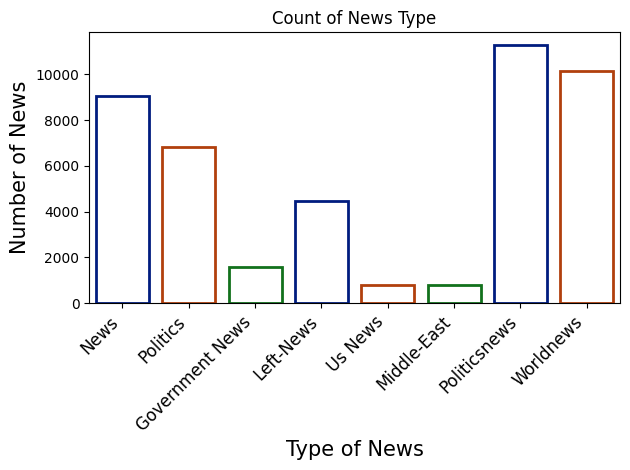

In [27]:
news_dataset['subject'] = news_dataset['subject'].str.replace('_', ' ').str.title()
ax = sns.countplot(
    x="subject",
    data=news_dataset,
    facecolor=(0, 0, 0, 0),
    linewidth=2,
    edgecolor=sns.color_palette("dark", 3),
)
ax.set(
    xlabel="Type of News",
    ylabel="Number of News",
    title="Count of News Type",
)
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()


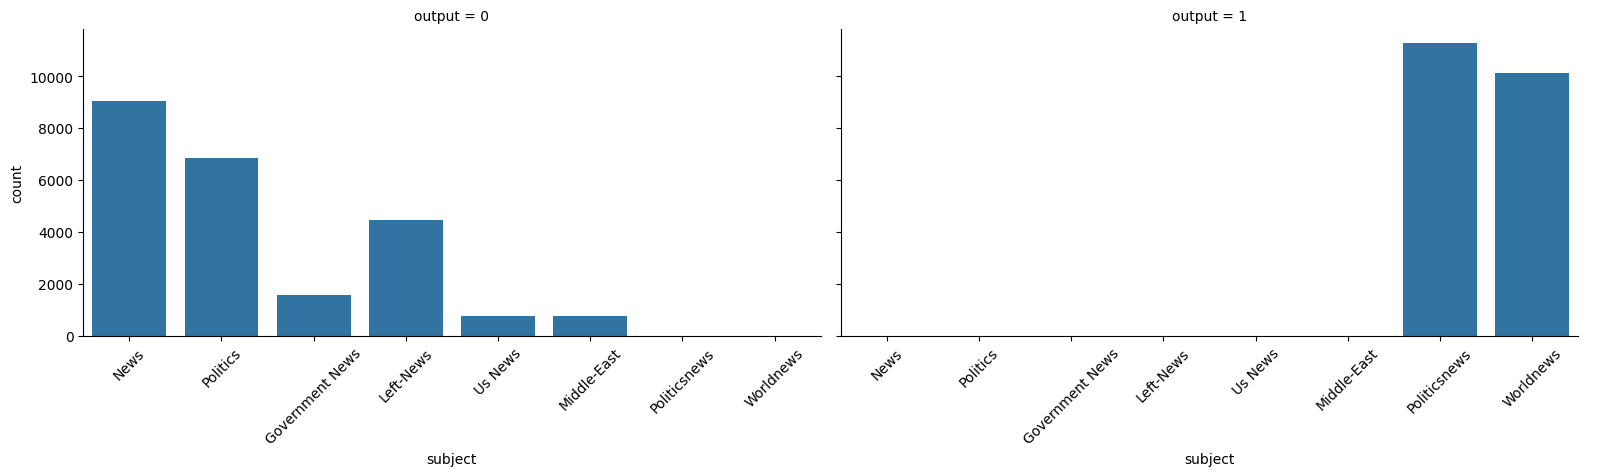

In [29]:
g = sns.catplot(x= "subject", col= "output",
                data= news_dataset, kind="count",
                height=4, aspect=2)

#Rotating the xlabels
g.set_xticklabels(rotation=45)

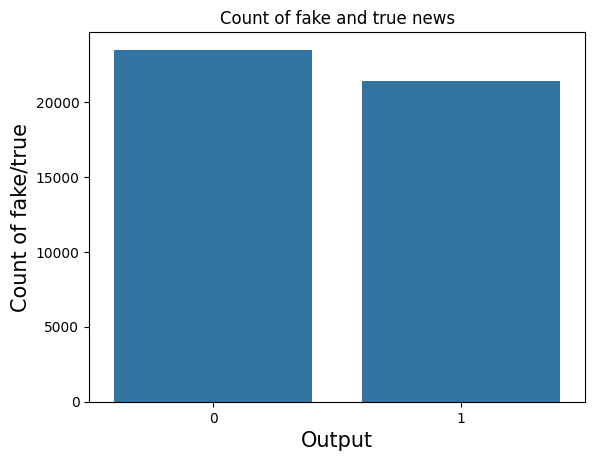

In [30]:
ax=sns.countplot(x="output", data= news_dataset)
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

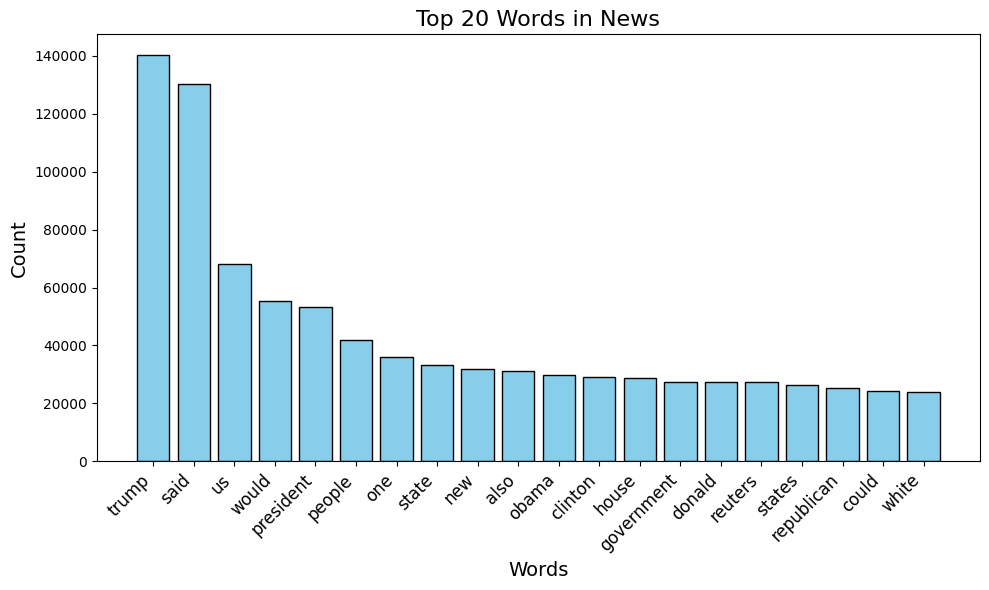

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(news_dataset['news'], 20)
df1 = pd.DataFrame(common_words, columns=['news', 'count'])
plt.figure(figsize=(10, 6))
plt.bar(df1['news'], df1['count'], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Top 20 Words in News', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

donald trump 25059
united states 18394
white house 15485
hillary clinton 9502
new york 8110
north korea 7053
president donald 6928
image via 6188
barack obama 5603
trump said 4816
prime minister 4753
president trump 4646
supreme court 4595
last year 4560
last week 4512
said statement 4425
fox news 4074
president obama 4065
islamic state 4014
national security 3858


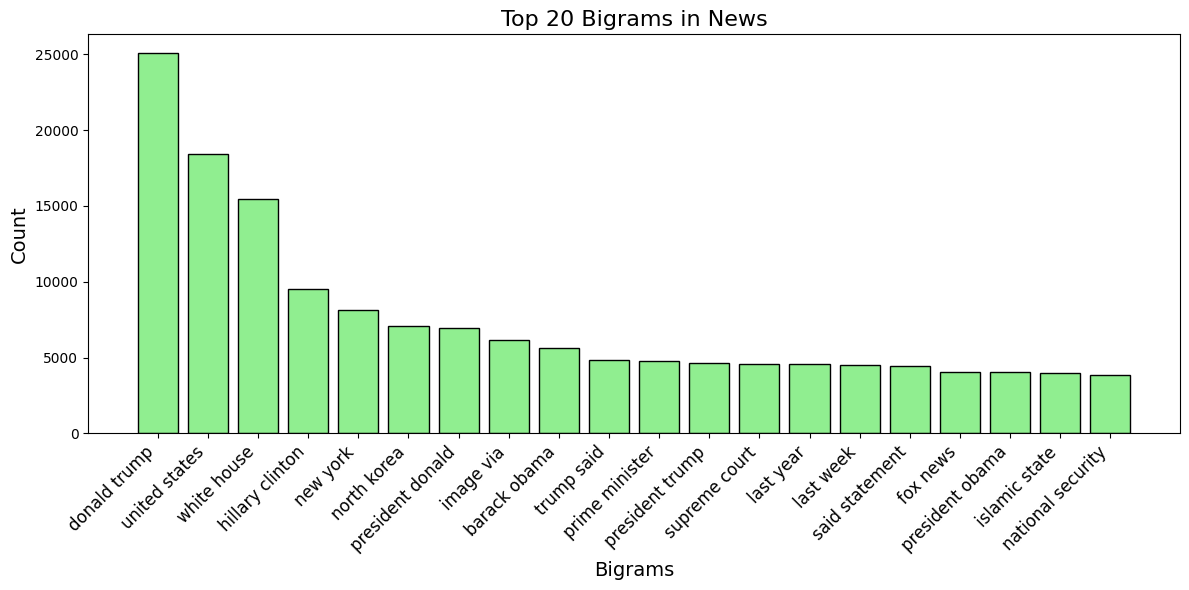

In [37]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(news_dataset['news'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns=['bigram', 'count'])
plt.figure(figsize=(12, 6))
plt.bar(df3['bigram'], df3['count'], color='lightgreen', edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Top 20 Bigrams in News', fontsize=16)
plt.xlabel('Bigrams', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

president donald trump 6808
president barack obama 3735
new york times 2034
donald trump realdonaldtrump 1790
reuters president donald 1476
black lives matter 1436
president united states 1096
white house said 1050
presidentelect donald trump 1043
new york city 1006
president vladimir putin 955
news century wire 951
national security adviser 898
affordable care act 868
director james comey 860
speaker paul ryan 851
fbi director james 778
state rex tillerson 775
secretary state rex 765
russian president vladimir 745


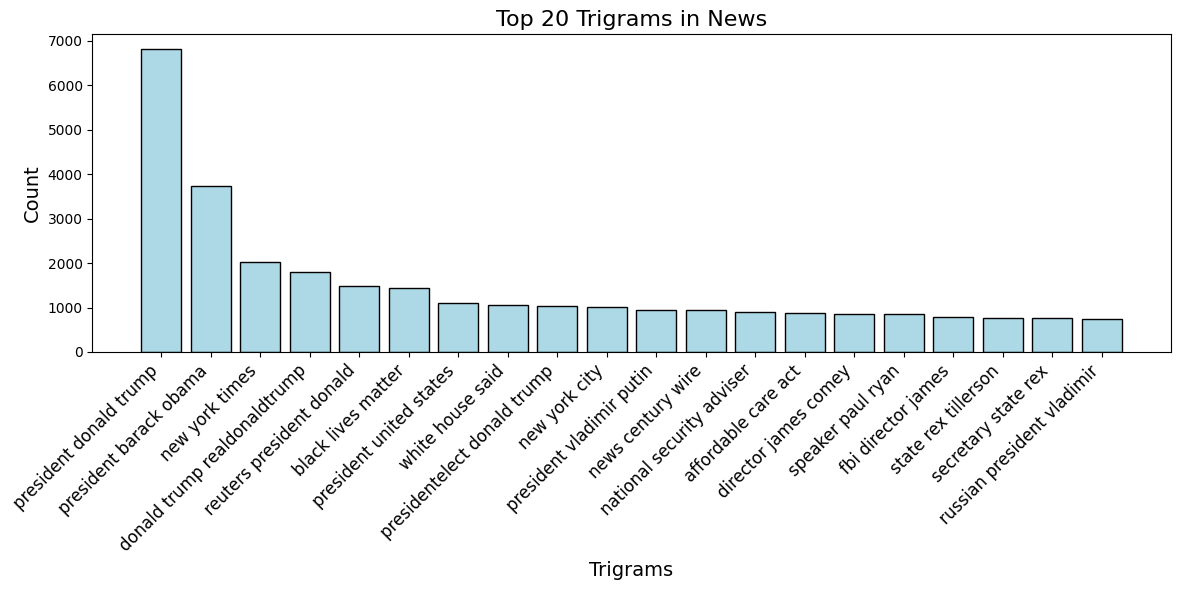

In [38]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(news_dataset['news'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns=['trigram', 'count'])
plt.figure(figsize=(12, 6))
plt.bar(df6['trigram'], df6['count'], color='lightblue', edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Top 20 Trigrams in News', fontsize=16)
plt.xlabel('Trigrams', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

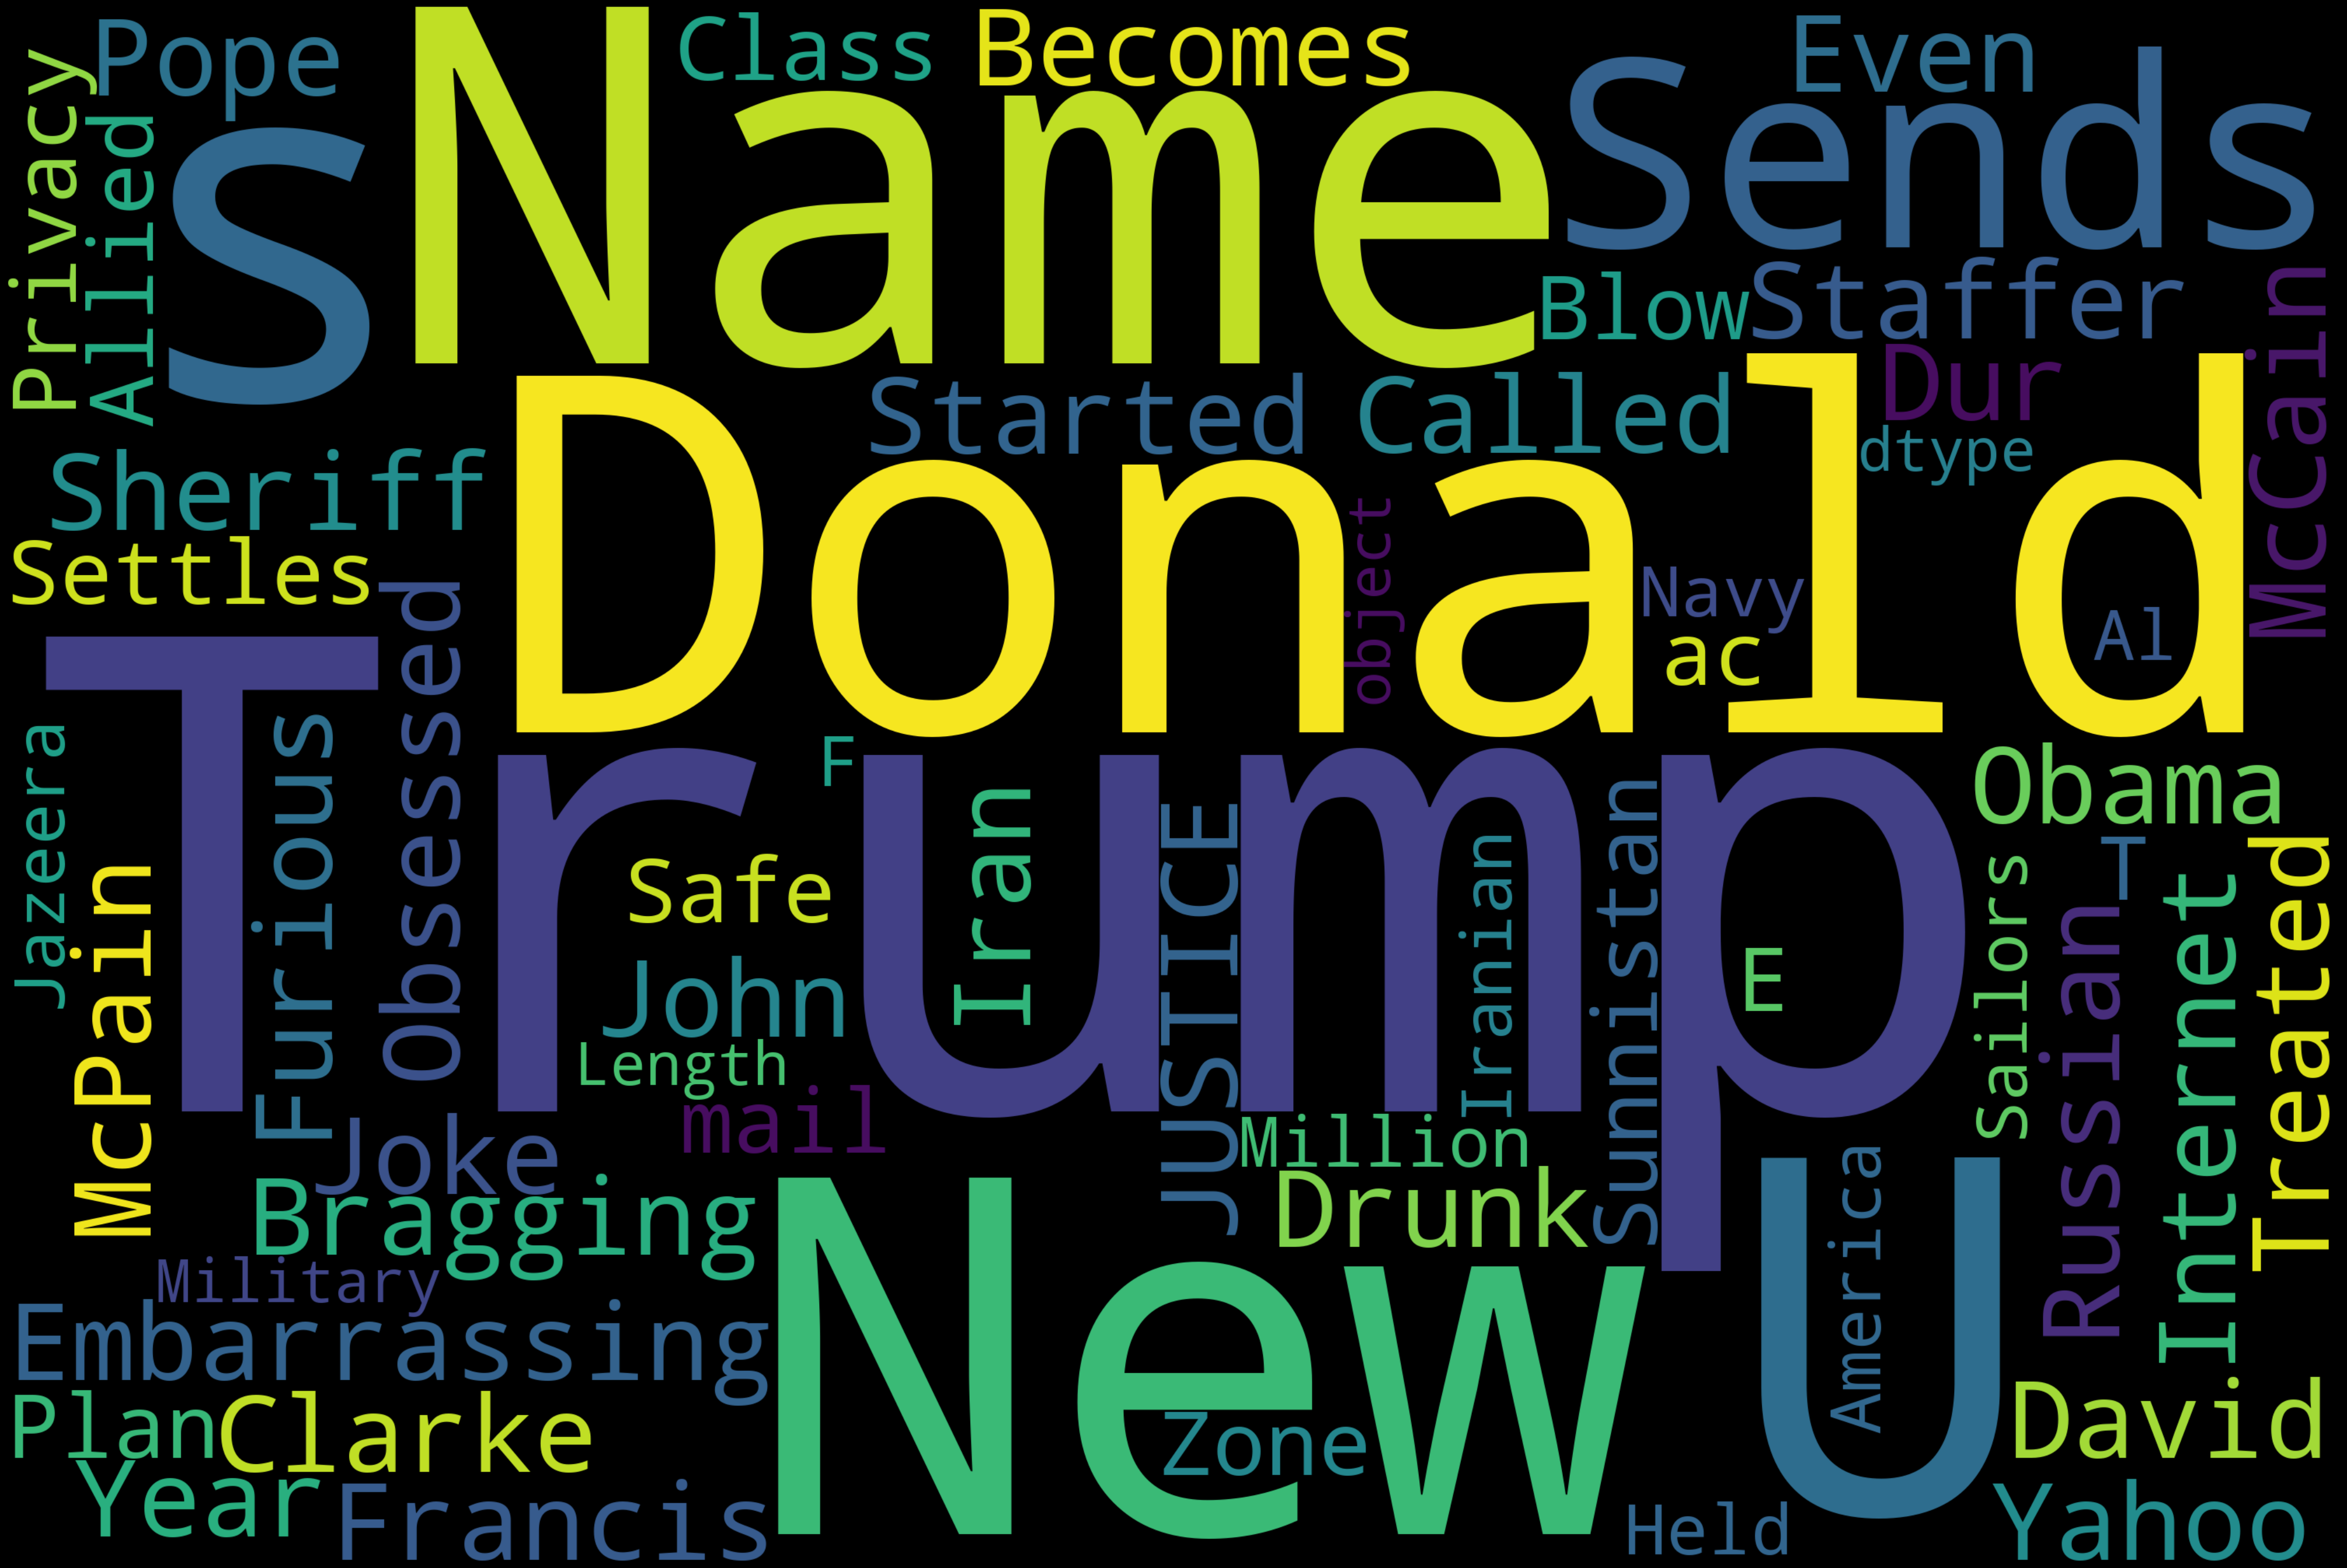

In [39]:
text = fake_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

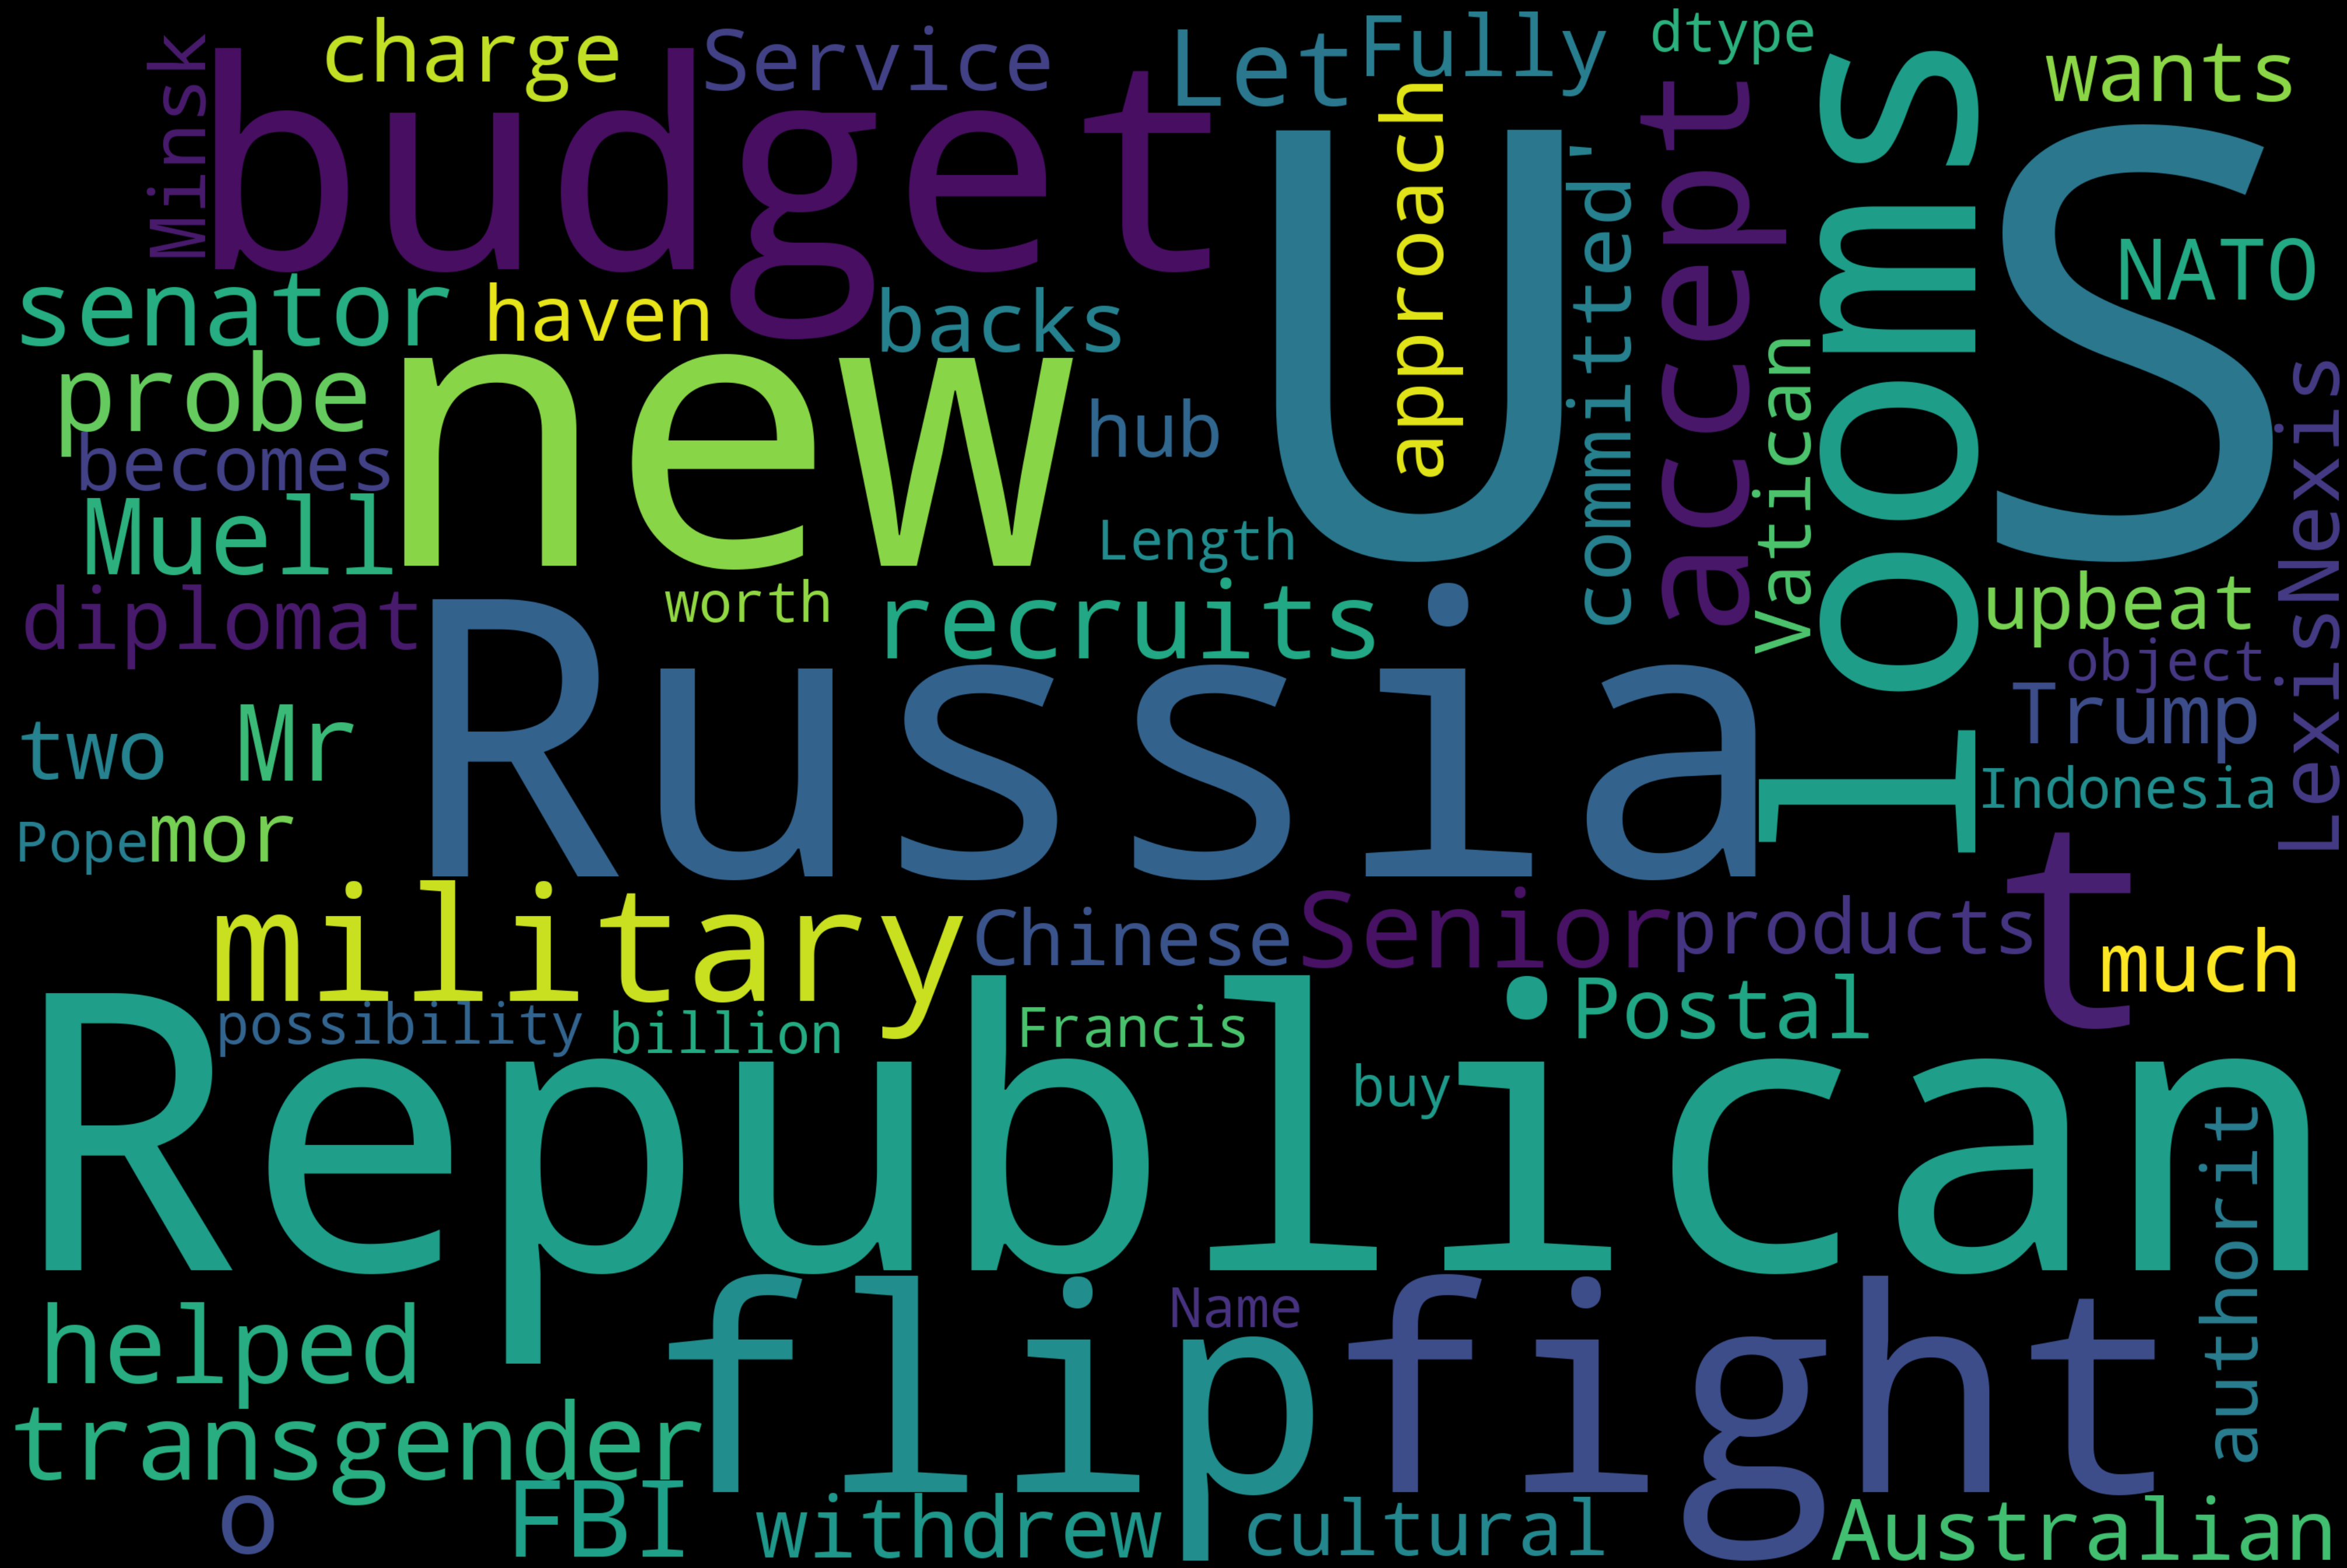

In [40]:
text = true_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
news_features= news_dataset.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

news
0  donald trump sends embarrassing new year’s eve...
1  drunk bragging trump staffer started russian c...
2  sheriff david clarke becomes internet joke thr...
3  trump obsessed even obama’s name coded website...
4  pope francis called donald trump christmas spe...

In [48]:
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news) 

In [49]:
corpus[1]

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

In [50]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44898, 5000)

In [52]:
y= news_dataset['output']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.965165172376326
Decision Tree Test Accuracy: 0.935341644336242
KNN Test Accuracy: 0.6133704313588128
Naive Bayes Test Accuracy: 0.9373245066758088


In [59]:
#LSTM
voc_size=10000 
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [60]:
sent_length=5000
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4963 5540 8386]
 [   0    0    0 ... 8611 3633 8386]
 [   0    0    0 ... 9987 6870 8386]
 ...
 [   0    0    0 ...  607 7518 6273]
 [   0    0    0 ... 1995 4248 3364]
 [   0    0    0 ... 6407 4911 3845]]


In [61]:
embedded_docs[1]

array([   0,    0,    0, ..., 8611, 3633, 8386], dtype=int32)

In [62]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) 
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

C:\Users\SURFACE\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [63]:
len(embedded_docs),y.shape

(44898, (44898,))

In [64]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_final.shape,y_final.shape

((44898, 5000), (44898,))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 48718s 104s/step - accuracy: 0.8730 - loss: 0.3108 - val_accuracy: 0.9699 - val_loss: 0.0891
Epoch 2/5
127/471 ━━━━━━━━━━━━━━━━━━━━ 8:10:14 86s/step - accuracy: 0.9772 - loss: 0.0743

KeyboardInterrupt: 

In [ ]:
# Predicting from test data
y_pred=model.predict_classes(X_test)

#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [7]:
true_news.tail(10)

subject              date  \
21407  worldnews  August 22, 2017    
21408  worldnews  August 22, 2017    
21409  worldnews  August 22, 2017    
21410  worldnews  August 22, 2017    
21411  worldnews  August 21, 2017    
21412  worldnews  August 22, 2017    
21413  worldnews  August 22, 2017    
21414  worldnews  August 22, 2017    
21415  worldnews  August 22, 2017    
21416  worldnews  August 22, 2017    

                                                    news  output  
21407  Mata Pires, owner of embattled Brazil builder ...       1  
21408  U.S., North Korea clash at U.N. forum over nuc...       1  
21409  U.S., North Korea clash at U.N. arms forum on ...       1  
21410  Headless torso could belong to submarine journ...       1  
21411  North Korea shipments to Syria chemical arms a...       1  
21412  'Fully committed' NATO backs new U.S. approach...       1  
21413  LexisNexis withdrew two products from Chinese ...       1  
21414  Minsk cultural hub becomes haven from authorit...       1  
21415  Vatican upbeat on possibility of Pope Francis ...       1  
21416  Indonesia to buy $1.14 billion worth of Russia...       1

In [23]:
true_news.loc[21414]

subject                                            worldnews
date                                        August 22, 2017 
news       Minsk cultural hub becomes haven from authorit...
output                                                     1
Name: 21414, dtype: object

In [8]:
fake_manual_testing=fake_news.tail(10)
for i in range(23480,23470,-1):
  fake_news.drop([i],axis=0, inplace=True)

true_manual_testing=true_news.tail(10)
for i in range(21416,21406,-1):
  true_news.drop([i],axis=0, inplace=True)

In [9]:
news = pd.concat([fake_news, true_news],axis = 0)

In [10]:
news.head(1)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   

                                                text subject       date  \
0  Donald Trump just couldn t wish all Americans ...    News  31-Dec-17   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   

  Unnamed: 163 Unnamed: 164 Unnamed: 165 Unnamed: 166 Unnamed: 167  \
0          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 168 Unnamed: 169 Unnamed: 170 Unnamed: 171 label  
0          NaN          NaN          NaN          NaN     0  

[1 rows x 173 columns]

In [11]:
news.isnull().sum()

title               0
text                0
subject            21
date               21
Unnamed: 4      44878
                ...  
Unnamed: 168    44897
Unnamed: 169    44897
Unnamed: 170    44897
Unnamed: 171    44897
label               0
Length: 173, dtype: int64

In [12]:
news = news.drop(['title','subject','date'],axis = 1)

In [13]:
news = news.sample(frac = 1)

In [14]:
news.head(1)

text Unnamed: 4  \
21127  Are you tired of supporting companies who are ...        NaN   

      Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
21127        NaN        NaN        NaN        NaN        NaN         NaN   

      Unnamed: 11 Unnamed: 12  ... Unnamed: 163 Unnamed: 164 Unnamed: 165  \
21127         NaN         NaN  ...          NaN          NaN          NaN   

      Unnamed: 166 Unnamed: 167 Unnamed: 168 Unnamed: 169 Unnamed: 170  \
21127          NaN          NaN          NaN          NaN          NaN   

      Unnamed: 171 label  
21127          NaN     0  

[1 rows x 170 columns]

In [15]:
news.reset_index(inplace=True)

In [16]:
news.drop(['index'],axis = 1,inplace = True)

In [17]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44899 entries, 0 to 44898
Columns: 170 entries, text to label
dtypes: int64(1), object(169)
memory usage: 58.2+ MB


C:\Users\En ty\AppData\Local\Temp\ipykernel_20112\1823230113.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=news,


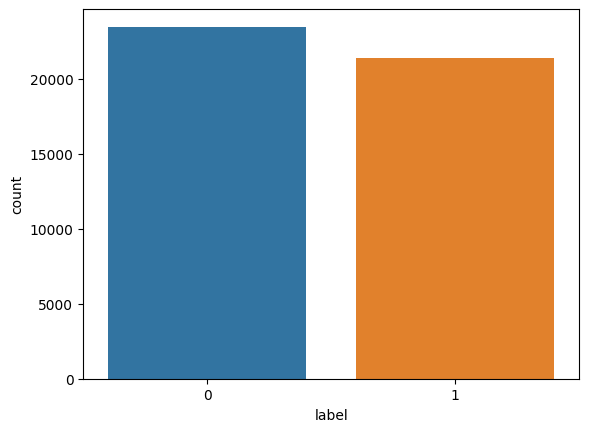

In [18]:
sns.countplot(data=news,
              x='label',
              order=news['label'].value_counts().index,
              palette=['#1f77b4', '#ff7f0e'])  # Replace these hex codes with your desired colors
plt.show()

In [20]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text



In [21]:
news['text'] = news['text'].apply(wordopt)

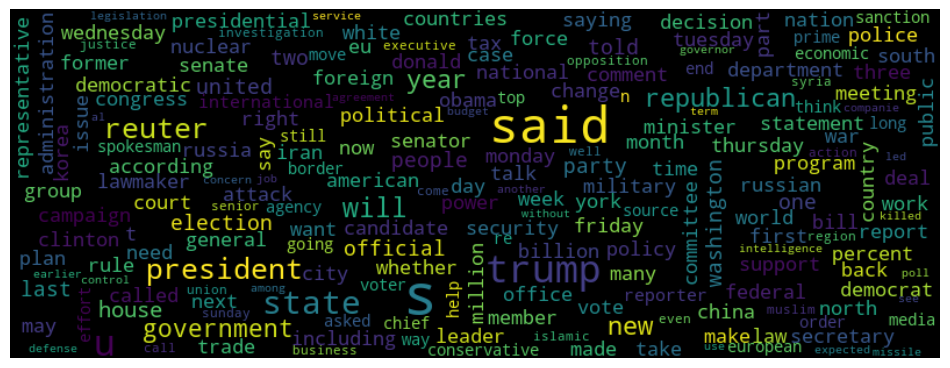

In [30]:
# Real
consolidated = ' '.join(
    word for word in news['text'][news['label'] == 1].astype(str))
wordCloud = WordCloud(width=800,
                      height=300,
                      random_state=21,
                      max_font_size=50,
                      collocations=False)
plt.figure(figsize=(12, 7))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

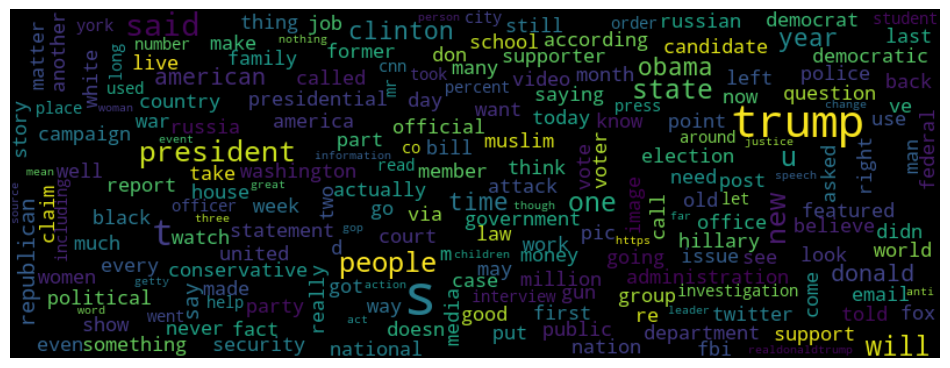

In [31]:
# Fake
consolidated = ' '.join(
    word for word in news['text'][news['label'] == 0].astype(str))
wordCloud = WordCloud(width=800,
                      height=300,
                      random_state=21,
                      max_font_size=50,
                      collocations=False)
plt.figure(figsize=(12, 7))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

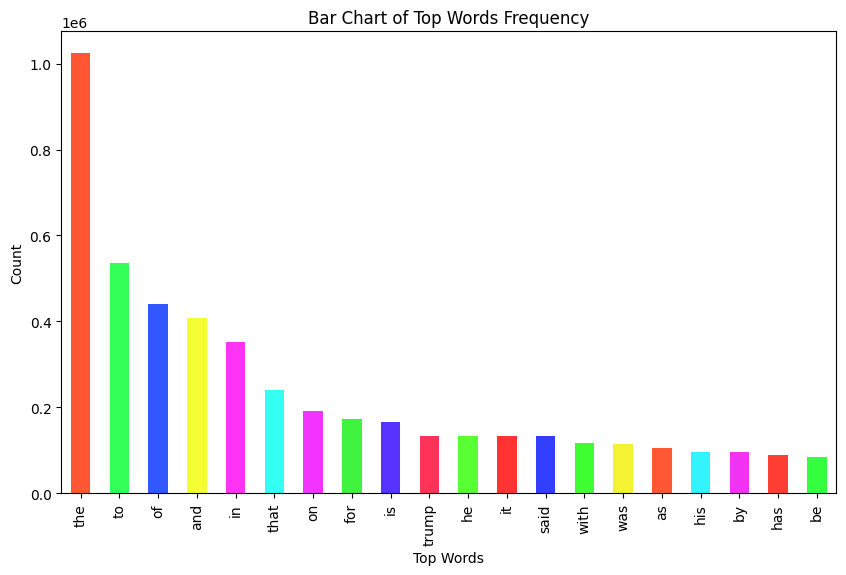

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top N words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Example data
# Replace `news['text']` with your dataset column containing text data.
common_words = get_top_n_words(news['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

# Define specific colors for each bar
colors = [
    '#FF5733', '#33FF57', '#3357FF', '#F3FF33', '#FF33F3',
    '#33FFF3', '#F333FF', '#3FF33F', '#5733FF', '#FF3357',
    '#57FF33', '#FF3333', '#333FFF', '#3FFF33', '#F3F333',
    '#FF5733', '#33F3FF', '#F333F3', '#FF3F33', '#33FF3F'
]

# Plot with specific colors for each bar
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    color=colors[:len(df1)],
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

plt.show()


In [20]:
x = news['text']
y = news['label']
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [21]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression

Logistic

In [23]:
lr=LogisticRegression()

In [24]:
lr.fit(xv_train,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(xv_test)

In [26]:
accuracy_score(y_test,y_pred)

0.985924276169265

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5925
           1       0.98      0.99      0.99      5300

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,y_pred)

array([[5837,   88],
       [  70, 5230]])

In [30]:
from sklearn.naive_bayes import MultinomialNB

 Naive Bayes

In [31]:

clf = MultinomialNB()

In [32]:
clf.fit(xv_train, y_train)

MultinomialNB()

In [33]:
ypred=clf.predict(xv_test)

In [34]:
clf.score(xv_test,y_test)

0.9348775055679287

In [35]:
confusion_matrix(y_test,ypred)

array([[5611,  314],
       [ 417, 4883]])

Decistiontree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tr=DecisionTreeClassifier()

In [38]:
tr.fit(xv_train,y_train)

DecisionTreeClassifier()

In [39]:
ypred=tr.predict(xv_test)
ypred

array([0, 0, 0, ..., 1, 0, 1])

In [40]:
accuracy_score(y_test,ypred)

0.9957238307349666

In [41]:
confusion_matrix(y_test,ypred)

array([[5908,   17],
       [  31, 5269]])

Randomforest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier()

In [44]:
rf.fit(xv_train,y_train)

RandomForestClassifier()

In [45]:
y_pr=rf.predict(xv_test)

In [46]:
rf.score(xv_test,y_test)

0.9883296213808463

In [47]:
confusion_matrix(y_test,y_pr)

array([[5860,   65],
       [  66, 5234]])

SVM

In [ ]:
# SVM
model=SVC(kernel='rbf')
model.fit(xv_train,y_train)

In [51]:
y_pre=model.predict(xv_test)

In [50]:
model.score(xv_test,y_test)

0.9939420935412027

In [ ]:
from sklearn.metrics import accuracy_score

models = [lr, clf, tr, rf, model]
model_names = ['Logistic Regression', 'Multinomial Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machine']

accuracies = []
for model, name in zip(models, model_names):
    y_pred = model.predict(xv_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))

for name, accuracy in accuracies:
    print(f'{name} Accuracy: {accuracy}')